In [65]:
!pip install nltk
!pip install wordcloud
!pip install textblob
!pip install matplotlib

In [66]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
from textblob import TextBlob
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt

In [67]:
# Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [68]:
train_data = pd.read_csv('/content/drive/MyDrive/train_set.csv')
test_data = pd.read_csv('/content/drive/MyDrive/test_set.csv')
validation_data = pd.read_csv('/content/drive/MyDrive/validation_set.csv')

In [69]:
print("Train Data:")
print(train_data.head())

Train Data:
      id     person_name                                  nine_box_category  \
0      1        John Doe  Category 1: 'Risk' (Low performance, Low poten...   
1  10045   Douglas Henry  Category 1: 'Risk' (Low performance, Low poten...   
2  10044   Douglas Henry  Category 1: 'Risk' (Low performance, Low poten...   
3  10005  Freddie Davies  Category 1: 'Risk' (Low performance, Low poten...   
4  10004  Freddie Davies  Category 1: 'Risk' (Low performance, Low poten...   

                                            feedback  adjusted  reviewed  \
0  John has not progressed in his position. He is...     False      True   
1  Douglas Henry has been having trouble in all a...     False     False   
2  Douglas has a lot to work on and areas to grow...     False     False   
3  Freddie is a nice guy, but his performance and...     False      True   
4  Freddie has been quite disappointing this quar...     False     False   

   label  feedback_len  num_of_sent  performance_class  

In [70]:
print("\nTest Data:")
print(test_data.head())



Test Data:
      id   person_name                                  nine_box_category  \
0  20051  Lacey Howard  Category 1: 'Risk' (Low performance, Low poten...   
1  20214   Jon Fischer  Category 1: 'Risk' (Low performance, Low poten...   
2  20213   Jon Fischer  Category 1: 'Risk' (Low performance, Low poten...   
3  20212   Jon Fischer  Category 1: 'Risk' (Low performance, Low poten...   
4  20186  Johanna Duke  Category 1: 'Risk' (Low performance, Low poten...   

                                            feedback  updated  reviewed  \
0  Lacey's performance has been sub standard in t...     True      True   
1  Jon Fischer has not been instrumental so far a...    False      True   
2  Jon fisher is a disappointment. Lazy and compl...    False      True   
3  Jon has been really difficult to work with for...    False      True   
4  Despite Johanna Duke appearing to be a capable...     True      True   

   label  performance_class  potential_class  \
0      0                  

In [71]:
print("\nValidation Data:")
print(validation_data.head())



Validation Data:
      id     person_name                                  nine_box_category  \
0  10046   Douglas Henry  Category 1: 'Risk' (Low performance, Low poten...   
1  10002  Freddie Davies  Category 1: 'Risk' (Low performance, Low poten...   
2  10001  Freddie Davies  Category 1: 'Risk' (Low performance, Low poten...   
3     86  Broderick Hays  Category 1: 'Risk' (Low performance, Low poten...   
4     84  Broderick Hays  Category 1: 'Risk' (Low performance, Low poten...   

                                            feedback  adjusted  reviewed  \
0  Douglas Henry has not performed at a high leve...     False     False   
1  Freddie Davies onboarded the team a few months...     False     False   
2  Freddie Davies needs lots of improvement in hi...     False     False   
3  Broderick is not doing so well. His work on a ...     False     False   
4  Broderick is always such a wildcard to put in ...     False     False   

   label  feedback_len  num_of_sent  performance_c

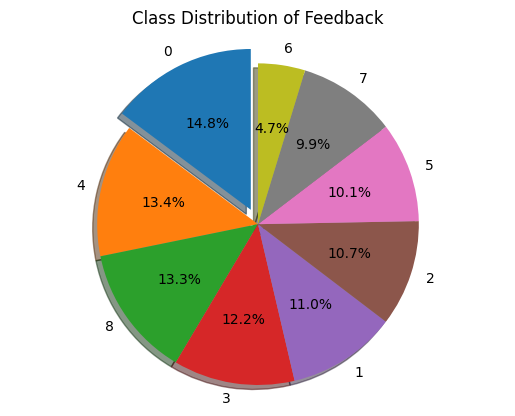

In [87]:

class_counts = train_data['label'].value_counts()
labels = class_counts.index
sizes = class_counts.values

explode = [0] * len(labels)


max_index = sizes.argmax()
explode[max_index] = 0.1


fig, ax = plt.subplots()
ax.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
ax.axis('equal')

plt.title('Class Distribution of Feedback')
plt.show()


In [88]:
import re
from nltk.corpus import stopwords
from collections import Counter

# Download NLTK resources
nltk.download('stopwords')
#Concatenate all feedback texts into a single string
all_text = ' '.join(train_data['feedback'].values)
#Remove URLs, mentions, and hashtags from the text
all_text = re.sub(r'http\S+', '', all_text)
all_text = re.sub(r'@\S+', '', all_text)
all_text = re.sub(r'#\S+', '', all_text)
#Split the text into individual words
words = all_text.split()
#Remove stop words
stop_words = set(stopwords.words('english'))
words = [word for word in words if word.lower() not in stop_words]
#Count the frequency of each word
word_counts = Counter(words)
#Get the top 100 most common words
top_words = word_counts.most_common(100)
#Display the top words
top_words


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


[('work', 490),
 ('time', 144),
 ('potential', 139),
 ('always', 138),
 ('team', 128),
 ('great', 126),
 ('improve', 125),
 ('performance', 115),
 ('good', 111),
 ('work.', 108),
 ('well', 102),
 ('would', 100),
 ('see', 94),
 ('team.', 92),
 ('shown', 91),
 ('much', 85),
 ('tasks', 84),
 ('could', 83),
 ('company.', 79),
 ('quality', 76),
 ('company', 75),
 ('high', 74),
 ('needs', 73),
 ('able', 72),
 ('time.', 69),
 ('job', 67),
 ('consistently', 67),
 ('seems', 65),
 ('new', 65),
 ('shows', 64),
 ('skills', 61),
 ('However,', 60),
 ('really', 60),
 ('one', 59),
 ('often', 58),
 ('get', 58),
 ('think', 57),
 ('better', 57),
 ('believe', 57),
 ('also', 56),
 ('take', 52),
 ('quarter.', 52),
 ('worker.', 51),
 ('worker', 51),
 ('solid', 51),
 ('little', 49),
 ('working', 48),
 ('show', 48),
 ('hard', 47),
 ('make', 46),
 ('future', 46),
 ('ability', 45),
 ("he's", 45),
 ('works', 44),
 ('within', 44),
 ('since', 44),
 ('feedback', 43),
 ('learn', 43),
 ('every', 42),
 ('task', 42),
 (

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


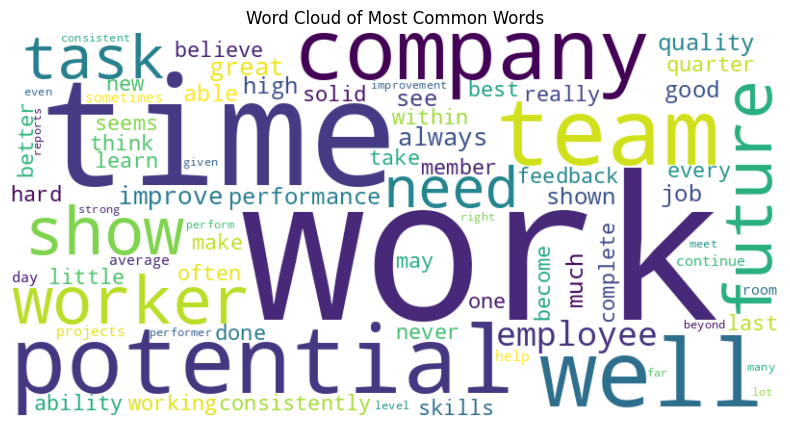

In [74]:
import re
from nltk.corpus import stopwords
from collections import Counter
import nltk
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# NLTK resources
nltk.download('stopwords')

# Concatenate all feedback texts into a single string
all_text = ' '.join(train_data['feedback'].values)

# Remove URLs, mentions, and hashtags from the text
all_text = re.sub(r'http\S+', '', all_text)
all_text = re.sub(r'@\S+', '', all_text)
all_text = re.sub(r'#\S+', '', all_text)

# Split the text into individual words
words = all_text.split()

# Remove stop words
stop_words = set(stopwords.words('english'))
words = [word for word in words if word.lower() not in stop_words]

# Count the frequency of each word
word_counts = Counter(words)

# Get the top 100 most common words (or as many as you want)
top_words = [word[0] for word in word_counts.most_common(100)]  # Adjust the number as needed

# Generate and display the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(top_words))

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Most Common Words')
plt.show()


#Preprocess the Data

In [75]:
# NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [76]:
# Function to preprocess the text data
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()

    # Tokenize the text
    tokens = word_tokenize(text)

    # Remove stopwords and punctuation
    tokens = [word for word in tokens if word not in stopwords.words('english') and word not in string.punctuation]

    # Rejoin tokens into a single string
    processed_text = ' '.join(tokens)

    return processed_text

In [77]:
# Preprocessing to the feedback column
train_data['processed_feedback'] = train_data['feedback'].apply(preprocess_text)
test_data['processed_feedback'] = test_data['feedback'].apply(preprocess_text)
validation_data['processed_feedback'] = validation_data['feedback'].apply(preprocess_text)


In [78]:
#First few rows after preprocessing
print("Processed Train Data:")
print(train_data[['feedback', 'processed_feedback']].head())


Processed Train Data:
                                            feedback  \
0  John has not progressed in his position. He is...   
1  Douglas Henry has been having trouble in all a...   
2  Douglas has a lot to work on and areas to grow...   
3  Freddie is a nice guy, but his performance and...   
4  Freddie has been quite disappointing this quar...   

                                  processed_feedback  
0  john progressed position continuously late lea...  
1  douglas henry trouble areas job rarely arrives...  
2  douglas lot work areas grow work lacks drive a...  
3  freddie nice guy performance potential levels ...  
4  freddie quite disappointing quarter quite unde...  


#Sentiment Analysis

In [79]:
from textblob import TextBlob

# Function to get the sentiment polarity
def get_sentiment(text):
    return TextBlob(text).sentiment.polarity


In [80]:
# Sentiment analysis
train_data['sentiment'] = train_data['processed_feedback'].apply(get_sentiment)
test_data['sentiment'] = test_data['processed_feedback'].apply(get_sentiment)
validation_data['sentiment'] = validation_data['processed_feedback'].apply(get_sentiment)


In [81]:
# Sentiment scores
print("Train Data with Sentiment:")
print(train_data[['feedback', 'processed_feedback', 'sentiment']].head())



Train Data with Sentiment:
                                            feedback  \
0  John has not progressed in his position. He is...   
1  Douglas Henry has been having trouble in all a...   
2  Douglas has a lot to work on and areas to grow...   
3  Freddie is a nice guy, but his performance and...   
4  Freddie has been quite disappointing this quar...   

                                  processed_feedback  sentiment  
0  john progressed position continuously late lea...   0.154167  
1  douglas henry trouble areas job rarely arrives...   0.148571  
2  douglas lot work areas grow work lacks drive a...   0.068750  
3  freddie nice guy performance potential levels ...   0.043750  
4  freddie quite disappointing quarter quite unde...  -0.232407  


#Topic Modeling (LDA)

In [82]:
# Vectorize the processed feedback
vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
train_vectors = vectorizer.fit_transform(train_data['processed_feedback'])


In [34]:
# Apply LDA
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(train_vectors)


LatentDirichletAllocation(n_components=5, random_state=42)

In [35]:
# Topics
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d:" % (topic_idx))
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))


In [83]:
# Number of top words to display per topic
no_top_words = 10
display_topics(lda, vectorizer.get_feature_names_out(), no_top_words)

Topic 0:
work improve time quality performance worker potential good consistently company
Topic 1:
work time potential great company tasks needs team complete task
Topic 2:
team work time company skills good shown great tasks new
Topic 3:
work company performance potential time tasks employee job able future
Topic 4:
work team job company potential great tasks time improve player


Insights and Recommendations

In [84]:
# Sentiment Analysis
average_sentiment = train_data['sentiment'].mean()
print(f"\nAverage Sentiment: {average_sentiment:.2f}")

if average_sentiment > 0:
    print("Overall positive sentiment in employee feedback.")
elif average_sentiment < 0:
    print("Overall negative sentiment in employee feedback.")
else:
    print("Neutral sentiment in employee feedback.")


Average Sentiment: 0.18
Overall positive sentiment in employee feedback.


In [85]:
#Topic Modeling
print("\nKey Topics Identified:")
display_topics(lda, vectorizer.get_feature_names_out(), no_top_words)



Key Topics Identified:
Topic 0:
work improve time quality performance worker potential good consistently company
Topic 1:
work time potential great company tasks needs team complete task
Topic 2:
team work time company skills good shown great tasks new
Topic 3:
work company performance potential time tasks employee job able future
Topic 4:
work team job company potential great tasks time improve player


In [86]:
# Recommendations
print("\nRecommendations:")
if average_sentiment < 0:
    print("Consider addressing negative sentiments by enhancing employee engagement and support.")
print("Focus on the key topics identified to make targeted improvements.")


Recommendations:
Focus on the key topics identified to make targeted improvements.
